In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("ex1data1.txt")

df = pd.DataFrame(data)
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

m = len(x)

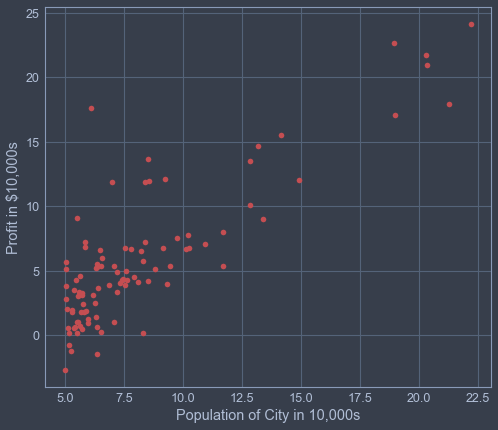

In [21]:
plt.figure(figsize = (8,7))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(x, y, "ro")

In [7]:
X = np.c_[np.ones(m, dtype=np.float64), np.array(x, dtype=np.float64)]
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
cost_history = []

In [8]:
#Calculating the cost function 
def computeCost(X, y, theta):
    cost = 0
    for (i, row) in enumerate(X):
        h = np.transpose(theta) @ row
        cost = cost + np.square(h-y[i])/(2*m)
        
    return cost

In [9]:
computeCost(X, y, theta)

array([32.07273388])

In [10]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    for iters in range(iterations):
        temp1 = theta[0] - alpha * (np.sum([((np.transpose(theta) @ row) - y[i]) for (i, row) in enumerate(X)]) / m)
        temp2 = theta[1] - alpha * (np.sum([((np.transpose(theta) @ row) - y[i]) * row for (i, row) in enumerate(X)]) / m)
        theta[0] = temp1
        theta[1] = temp2
        
        cost_history.append(computeCost(X, y, theta))
    
    return theta

In [11]:
theta = gradientDescent(X, y, theta, alpha, iterations)

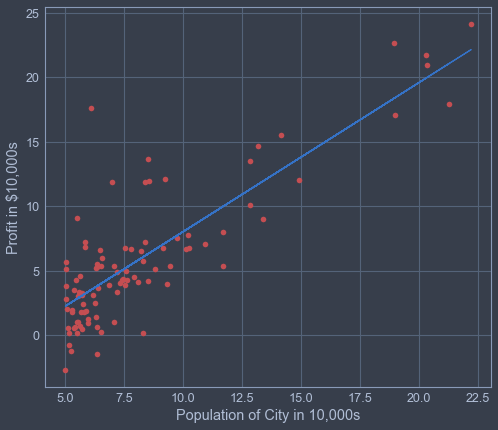

In [22]:
plt.figure(figsize = (8,7))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(x, y, "ro")
plt.plot(X[:, 1], X @ theta, 'b-')